In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from dataclasses import dataclass


@dataclass
class EvaluationConfig:
    test_dir: str
    evaluation_dir: str
    batch_size: int
    target_size: tuple


# Main process class
class ModelEvaluator:
    def __init__(self, config, model):
        self.config = config
        self.model = model

    def load_data(self):
        datagen = ImageDataGenerator(rescale=1.0/255.0)
        self.test_generator = datagen.flow_from_directory(
            self.config.test_dir,
            target_size= self.config.target_size,
            batch_size=self.config.batch_size,
            class_mode='categorical',
            shuffle=False
        )
        self.classes = list(self.test_generator.class_indices.keys())

    def evaluate(self):
        self.test_generator.reset()
        test_loss, test_accuracy = self.model.evaluate(self.test_generator, verbose=1)
        preds = self.model.predict(self.test_generator)
        pred_labels = np.argmax(preds, axis=1)
        true_labels = self.test_generator.classes

        f1 = f1_score(true_labels, pred_labels, average='weighted')
        cls_report = classification_report(true_labels, pred_labels, target_names=self.classes, output_dict=True)

        self.plot_confusion_matrix(true_labels, pred_labels)

        print(f'Test Loss: {test_loss:.4f}')
        print(f'Test Accuracy: {test_accuracy:.4f}')
        print(f'F1 Score: {f1:.4f}')
        print(classification_report(true_labels, pred_labels, target_names=self.classes))

        return {
            'test_loss': test_loss,
            'test_accuracy': test_accuracy,
            'f1_score': f1,
            'classification_report': cls_report
        }

    def plot_confusion_matrix(self, true_labels, pred_labels):
        cm = confusion_matrix(true_labels, pred_labels)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=self.classes, yticklabels=self.classes)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.savefig(os.path.join(self.config.evaluation_dir, 'confusion_matrix.png'))
        # plt.close()





2024-05-17 17:57:36.021793: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 17:57:36.021926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 17:57:36.022948: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-17 17:57:36.033045: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 17:57:37.453095: W tensorflow/compiler/tf2

# Evaluate the Xception model

2024-05-17 02:28:44.600093: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 02:28:44.641683: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 02:28:44.641860: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 02:28:44.647304: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 02:28:44.647378: I external/local_xla/xla/stream_executor

Found 1311 images belonging to 4 classes.


2024-05-17 02:28:58.901489: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17164992 exceeds 10% of free system memory.
2024-05-17 02:28:59.957564: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17164992 exceeds 10% of free system memory.
2024-05-17 02:29:00.023231: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-05-17 02:29:00.271522: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-17 02:29:02.545632: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-17 02:29:06.754555: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more mem

 1/82 [..............................] - ETA: 10:58 - loss: 0.0145 - accuracy: 1.0000

2024-05-17 02:29:07.003783: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


81/82 [============================>.] - ETA: 0s - loss: 0.1656 - accuracy: 0.9545

2024-05-17 02:29:30.791943: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


82/82 [==============================] - 32s 296ms/step - loss: 0.1648 - accuracy: 0.9542


2024-05-17 02:29:31.032074: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


82/82 [==============================] - 19s 223ms/step
Test Loss: 0.1648
Test Accuracy: 0.9542
F1 Score: 0.9541
              precision    recall  f1-score   support

      glioma       1.00      0.88      0.94       300
  meningioma       0.89      0.94      0.92       306
     notumor       0.98      0.99      0.99       405
   pituitary       0.95      0.99      0.97       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.95      0.95      1311



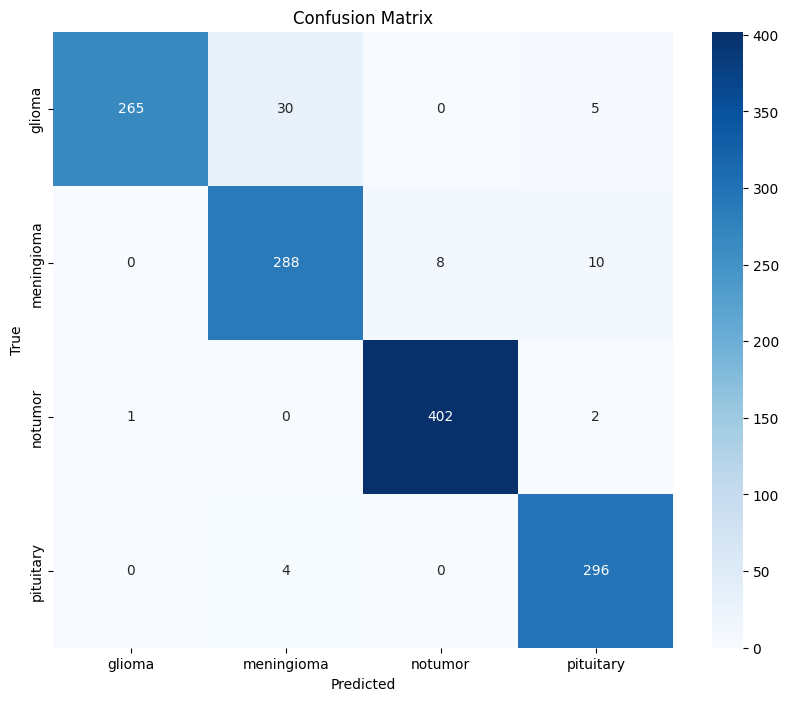

In [3]:
config = EvaluationConfig(
    test_dir="Data/Testing", 
    evaluation_dir="Evaluation/Xception",
    target_size= (299,299),
    batch_size= 16
    )
model = tf.keras.models.load_model("Model/best_model_Xception.h5")  # Load your pre-trained model here
evaluator = ModelEvaluator(config, model)
evaluator.load_data()
evaluation_results = evaluator.evaluate()

# Evaluate the InceptionV3 model

Found 1311 images belonging to 4 classes.


2024-05-17 18:03:01.867928: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-17 18:03:02.275954: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-17 18:03:08.591756: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-17 18:03:08.766495: W external/local_tsl/tsl/framework/bfc_

81/82 [============================>.] - ETA: 0s - loss: 0.1240 - accuracy: 0.9606

2024-05-17 18:03:21.518510: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.07GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-17 18:03:21.884580: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.07GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


82/82 [==============================] - 12s 129ms/step
Test Loss: 0.1226
Test Accuracy: 0.9611
F1 Score: 0.9610
              precision    recall  f1-score   support

      glioma       0.98      0.89      0.93       300
  meningioma       0.90      0.95      0.92       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



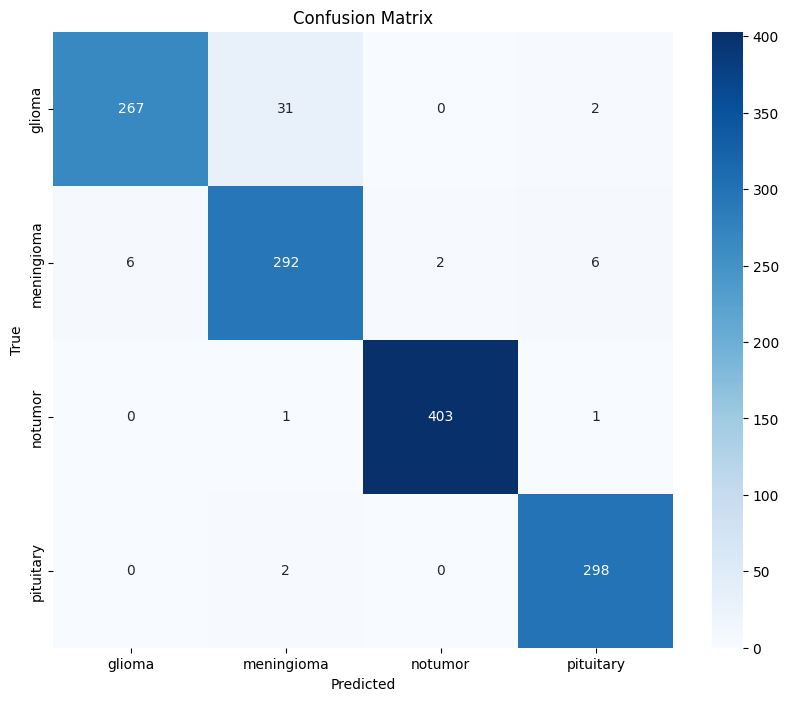

In [3]:
config = EvaluationConfig(
    test_dir="Data/Testing", 
    evaluation_dir="Evaluation/Inceptionv3",
    target_size= (299,299),
    batch_size= 16
    )
model = tf.keras.models.load_model("Model/best_model_InceptionV3.h5")  # Load your pre-trained model here
evaluator = ModelEvaluator(config, model)
evaluator.load_data()
evaluation_results = evaluator.evaluate()